# COGS 108 - Final Project 

# Overview

Our project is focused on finding the relationship between income and health, confirming with what the previous studies have shown. We are attempting to see if low income in households correlates to low health levels in the United States.  We will look into how multiple factors, such as one’s socioeconomic status and daily food choices, can affect prevalence rate of diabetes and obesity.

# Names

- Amanda Ochoa
- Dustin Lamperts
- Minghan Guo
- Diana Torres
- Xiangjian(Aaron) Zeng 

# Group Members IDs

- A########
- A########
- A########
- A########

# Research Question

What is the relationship between the socio-economic status and the nutritional value of their choices of food consumption in the United States? 
Are people with low socio-economic more prone to health issues related to diet, such as diabetes and obesity? 
Or 
Are people with low socio-economic status have more health issues related to diet, such as diabetes and obesity, compared to people from high socio-economic status? 

## Background and Prior Work

The American Journal of Clinical Nutrition proposes the idea of a causal relation between socioeconomic status and diet quality, which inevitably weighs into the health of one’s life. Living off low wages makes it inevitably harder to access the right food products, which in turn leads to poor choices of food consumption. Nicole Darmon and Adam Drewnowski’s article,  “Does social class predict diet quality?” ,  not only explores the quality of food consumption but also the effects that it has on an individual’s health. Through observations and surveys, Darmon and Drewnowski were able to conclude that lower socioeconomic statuses typically resulted in an energy dense and nutrient poor diet- which refers to products such as hamburgers. This specific food group often leads to overconsumption and catalyzes health risks such as obesity and diabetes. There were also findings that those with a higher socio-economic status were more likely to choose whole grains, vegetables, and fruit. This is probably due to availability of product; whereas people with lower socioeconomic statuses are unable to attain these power foods because of limited accessibility to good product or because it is not affordable. When comparing food prices and diet costs, there was an evident positive correlation between the cost and quality of a product. Therefore, in order to acquire a healthy diet and lifestyle, it is a requirement to attain more money.

Another article that sheds light onto the correlation between socio-economic status and quality of health is in Nancy Adler, W. Thomas Boyce, and other researchers. They mention in, “Socioeconomic Inequalities in Health: No Easy Solution”, that throughout history there has been an abundance of records and research that assert the relationships socioeconomic status has had. Their study primarily focused on gathering data about qualities that affect health outcomes across the span of many countries including: the United States and different regions in Europe. The null hypothesis was that socioeconomic status was not a factor in health outcomes and the primary cause of poor was if someone was insured or not. Adler and other researchers proposed that socioeconomic status was the driving factor for poorer health outcomes because of lack of resources and how it can affect an individual’s ability to engage in health promoting and disease preventing behaviors (Adler, 3144). The researchers are able to accept the alternative hypothesis by bringing in their evidence and case studies such as information gathered from Rhode Island. The Rhode Island information gives the following statistics: death rates for wealthier individuals was 10.8 per 1000 while those of a lower socioeconomic status had a death rate of 24.8 per 1000 (Adler, 3140). 

Although we agree with Adler and Darmon’s research, we sought out new information to better assert our hypothesis. We wished to find a dataset that was specified to the United States and something closer to our current timeline. This is when we found the Thirty Food Plan. The US Department of Agriculture’s study, Thirty Food Plan, is also mentioned and states that if families with lower incomes bought healthier foods it would take up about 35-40% of their income. 35-40% is a ludicrous amount that no person should have to sacrifice in order to lead a better lifestyle. Therefore, we can present the argument that the driving factor of maintaining a healthy diet is to have a higher socioeconomic status. This method is also a preventative measure against diseases and health risks. 


References (include links):
- 1) Nicole Darmon, Adam Drewnowski, Does social class predict diet quality?, The American Journal of Clinical Nutrition, Volume 87, Issue 5, May 2008, Pages 1107–1117, https://doi.org/10.1093/ajcn/87.5.1107
- 2) https://jamanetwork.com/journals/jama/articlepdf/406985/jama_269_24_031.pdf

# Hypothesis


People with a lower socio-economic status are more likely to develop health issues than those with a higher socioeconomic status. We reason that this is due to a lack of resources for healthier alternatives for food when you have a lower socio-economic status. 

# Dataset(s)

- Dataset Name: USDA Food Environment Atlas
- Link to the dataset: https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/
- Number of observations: 3143

We are using our dataset from United States Department of Agriculture Economic Research Service (USDA ERS), that was available for the public use. The dataset includes a total of 275 variables with each containing over 3100 observations, divided into 9 different spreadsheets. Each spreadsheet contains  relevant variables and observations that yields to important information about the food accessibility, availability of stores and restaurants nearby, availability of food assistance program (SNAP), food insecurity, taxes on food, availability of local foods, health status, and socio-economic status of people all over the U.S. from different backgrounds. The dataset we are using needs some modification, including data cleaning, merging multiple spreadsheets, and converting to one single csv file. 
    Because the data had multiple spreadsheets (in .xls), we had to exclusively select variables from each spreadsheet and merge into one single csv file. Out of 275 variables, we chose 28 variables that were relevant to our project. After merging and selecting necessary variables, we removed all missing data that are either empty or referenced as “-9999.” Depending on the variable we were looking at, we also removed all the negative values.

# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

### Loading the Data Set
Instead of importing the entire data set with over 200 variables, we cleaned up the data set first by selecting the variables we wanted and collecting them into one csv file.

In [5]:
# Import csv file
df = pd.read_csv('data_cleaned.csv')

In [6]:
df.head()

,FIPS,State,County,FFRPTH14,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,MEDHHINC15,POVRATE15
0,1001,AL,Autauga,0.649878,77.246156,17.582599,2.400542,0.855766,13.0,34.1,56580.0,12.7
1,1003,AL,Baldwin,0.659634,83.504787,9.308425,4.384824,0.735193,10.4,27.4,52387.0,12.9
2,1005,AL,Barbour,0.818239,46.753105,46.691190,5.051535,0.389700,18.4,44.4,31433.0,32.0
3,1007,AL,Bibb,0.222163,75.020729,21.924504,1.771765,0.096007,14.8,40.3,40767.0,22.2
4,1009,AL,Blount,0.363832,88.887338,1.263040,8.070200,0.200621,14.1,34.6,50487.0,14.7


In [7]:
# Rename columns for easier use
df.columns = (['FIPS', 'state', 'county', 'fastfood', 'white', 'black', 'hispanic', 'asian', 'diabetes', 'obesity', 'income', 'poverty'])
df.head()

,FIPS,state,county,fastfood,white,black,hispanic,asian,diabetes,obesity,income,poverty
0,1001,AL,Autauga,0.649878,77.246156,17.582599,2.400542,0.855766,13.0,34.1,56580.0,12.7
1,1003,AL,Baldwin,0.659634,83.504787,9.308425,4.384824,0.735193,10.4,27.4,52387.0,12.9
2,1005,AL,Barbour,0.818239,46.753105,46.691190,5.051535,0.389700,18.4,44.4,31433.0,32.0
3,1007,AL,Bibb,0.222163,75.020729,21.924504,1.771765,0.096007,14.8,40.3,40767.0,22.2
4,1009,AL,Blount,0.363832,88.887338,1.263040,8.070200,0.200621,14.1,34.6,50487.0,14.7


In [8]:
df.shape

(3143, 12)

# Data Cleaning

Prior to loading the data set into jupyter, we condensed the variables we wanted into a csv file. This allowed us to focus on cleaning a smaller set of data.

In [11]:
# Check how many data points have null data in any column'
null_rows = df.isnull().any(axis=1).sum()
null_rows

4

In [ ]:
# The data set uses "-9999" as a signal for null data
# Find any cells that have this kind of null data
null_rows = df[df == "-9999"].any(axis=1).sum()
null_rows

In [12]:
# Drop any cells that have null data
df = df.dropna()
df.shape

(3139, 12)

# Data Analysis & Results

## Descriptive Analysis

We used a scatter_matrix to get a general sense of what variables have larger correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1fa0cd68>,
      dtype=object)

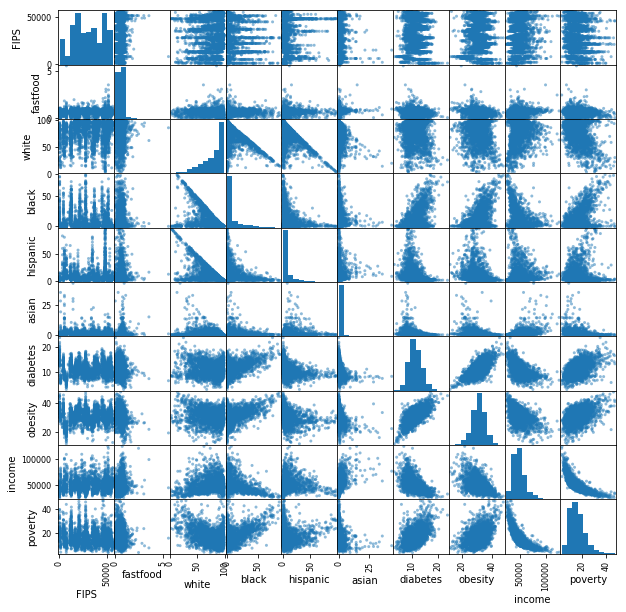

In [13]:
pd.plotting.scatter_matrix(df, figsize=(10, 10))

In [14]:
df.describe()

,FIPS,fastfood,white,black,hispanic,asian,diabetes,obesity,income,poverty
count,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000
mean,30392.532972,0.576744,78.360313,8.753403,8.292461,1.135387,11.236763,31.015833,48611.206117,16.260975
std,15156.298611,0.305546,19.787545,14.426701,13.196929,2.468433,2.482565,4.517109,12351.988288,6.442319
min,1001.000000,0.000000,2.860408,0.000000,0.000000,0.000000,3.300000,11.800000,22894.000000,3.400000
25%,18180.000000,0.413322,67.014549,0.400913,1.594090,0.270060,9.500000,28.300000,40438.000000,11.500000
50%,29177.000000,0.578052,85.774059,1.907184,3.285739,0.463388,11.100000,31.200000,46807.000000,15.200000
75%,45080.000000,0.732873,94.180771,9.732428,8.235463,0.985868,12.900000,33.800000,54164.000000,19.700000
max,56045.000000,5.555556,99.163180,85.438778,95.744774,43.014686,23.500000,47.600000,125900.000000,47.400000


[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Poverty Rate')]

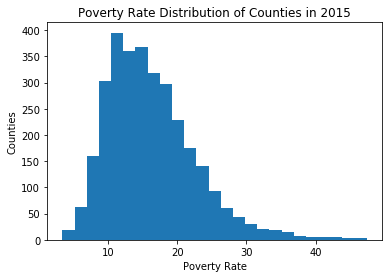

In [15]:
ax_pr=df['poverty'].plot.hist(bins=25,title='Poverty Rate Distribution of Counties in 2015')
ax_pr.set(xlabel="Poverty Rate", ylabel="Counties")
#mean:16.260975 std:6.442319

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Income')]

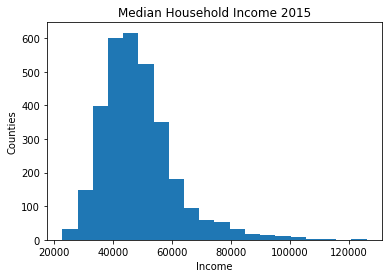

In [16]:
ax_pr=df['income'].plot.hist(bins=20,title='Median Household Income 2015')
ax_pr.set(xlabel="Income", ylabel="Counties")
#mean:48611.206117 std:12351.988288

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Adult Obesity Rate Rate')]

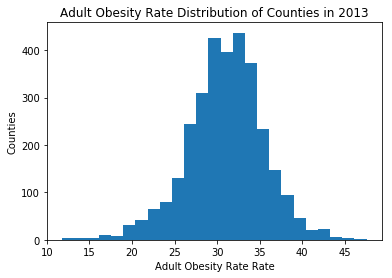

In [17]:
ax_pr=df['obesity'].plot.hist(bins=25,title='Adult Obesity Rate Distribution of Counties in 2013')
ax_pr.set(xlabel="Adult Obesity Rate Rate", ylabel="Counties")

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Adult Diabetes Rate Rate')]

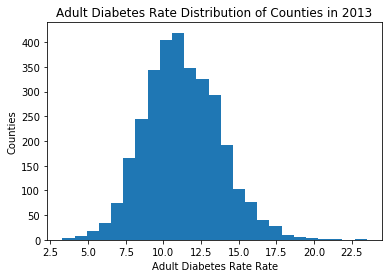

In [18]:
ax_pr=df['diabetes'].plot.hist(bins=25,title='Adult Diabetes Rate Distribution of Counties in 2013')
ax_pr.set(xlabel="Adult Diabetes Rate Rate", ylabel="Counties")

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Number of Fast Food Restaurants')]

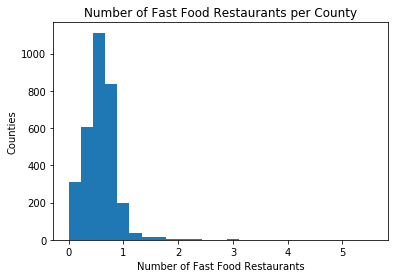

In [19]:
ax_pr=df['fastfood'].plot.hist(bins=25,title='Number of Fast Food Restaurants per County')
ax_pr.set(xlabel="Number of Fast Food Restaurants", ylabel="Counties")

In [20]:
# Transform the fast food data using a square root transform to make it more normal
df['fastfood10'] = df['fastfood']
df['fastfood10'] = df['fastfood10'].transform(np.sqrt)

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Number of Fast Food Restaurants')]

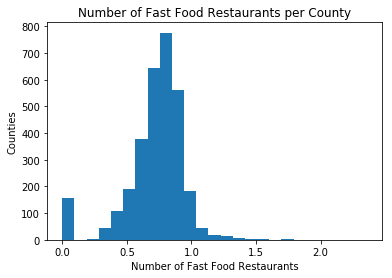

In [21]:
ax_pr=df['fastfood10'].plot.hist(bins=25,title='Number of Fast Food Restaurants per County')
ax_pr.set(xlabel="Number of Fast Food Restaurants", ylabel="Counties")

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Number of White People')]

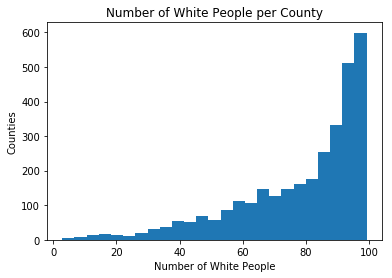

In [22]:
ax_pr=df['white'].plot.hist(bins=25,title='Number of White People per County')
ax_pr.set(xlabel="Number of White People", ylabel="Counties")

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Number of Black People')]

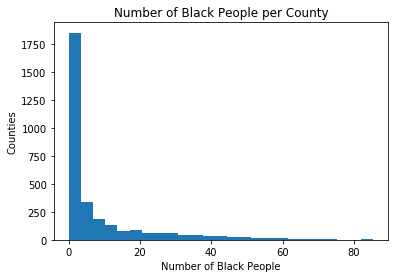

In [23]:
ax_pr=df['black'].plot.hist(bins=25,title='Number of Black People per County')
ax_pr.set(xlabel="Number of Black People", ylabel="Counties")

In [24]:
df['black10'] = df['black']
df['black10'] = df['black10'].transform(np.sqrt)

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Number of Black People')]

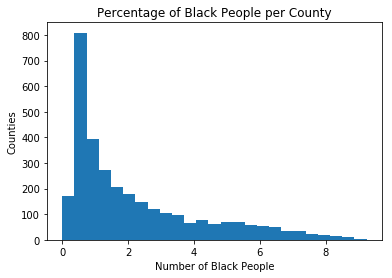

In [25]:
ax_pr=df['black10'].plot.hist(bins=25,title='Percentage of Black People per County')
ax_pr.set(xlabel="Number of Black People", ylabel="Counties")

[Text(0, 0.5, 'Counties'), Text(0.5, 0, 'Number of Hispanic People')]

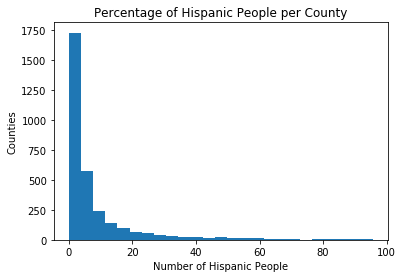

In [26]:
ax_pr=df['hispanic'].plot.hist(bins=25,title='Percentage of Hispanic People per County')
ax_pr.set(xlabel="Number of Hispanic People", ylabel="Counties")

In [28]:
df['income10'] = df['income']
df['income10'] = df['income10'].transform(np.log10)

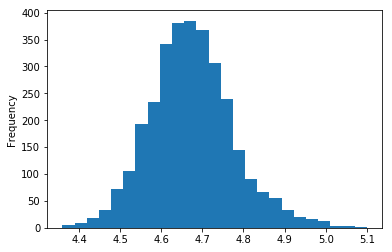

In [29]:
df['income10'].plot.hist(bins=25)

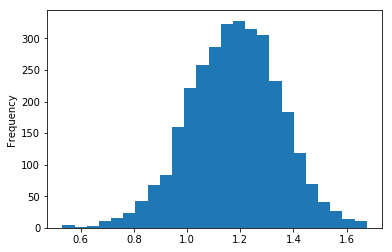

In [30]:
df['poverty10'] = df['poverty']
df['poverty10'] = df['poverty10'].transform(np.log10)
df['poverty10'].plot.hist(bins=25)

## Exploratory Analysis

The largest correlation we found is between income and obesity

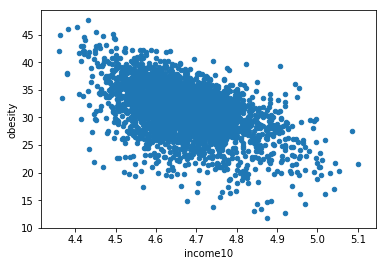

In [31]:
df.plot.scatter('income10', 'obesity')

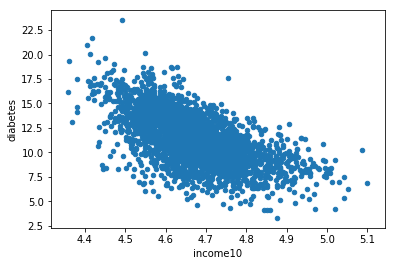

In [38]:
df.plot.scatter('income10', 'diabetes')

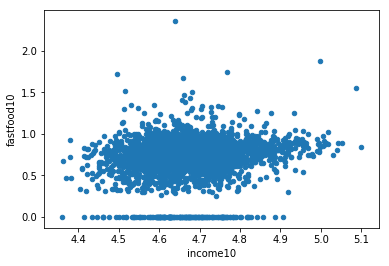

In [32]:
df.plot.scatter('income10', 'fastfood10')

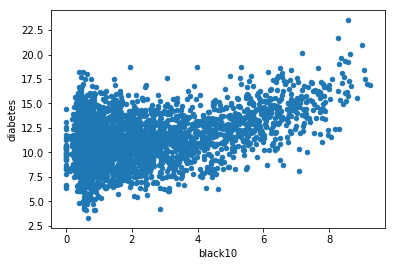

In [33]:
df.plot.scatter('black10', 'diabetes')

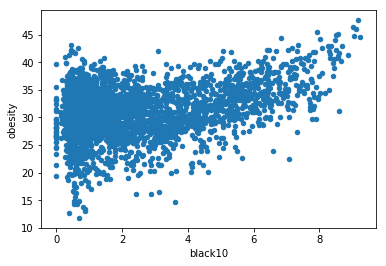

In [34]:
df.plot.scatter('black10', 'obesity')

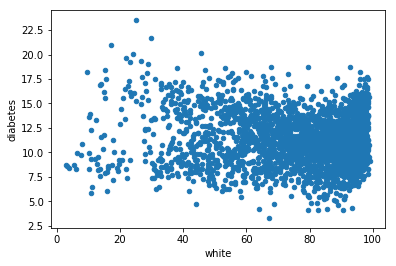

In [35]:
df.plot.scatter('white', 'diabetes')

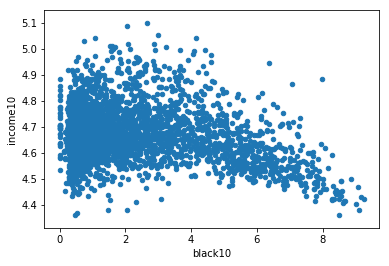

In [37]:
df.plot.scatter('black10', 'income10')

# Ethics & Privacy

The data was published for the public use by the United States Department of Agriculture. Since the data was released publicly it is accessible for us to use without limitations. The data was gathered with the knowledge and consent of participants, who were made aware of potential future uses of the data gathered. Our goal in analyzing this data is to help spread awareness of the lack of access to healthy food for people with lower socioeconomic status and to help increase access to healthy food for those people. By this we are not making the claim that all people in a low socioeconomic class are unhealthy but rather trying to see if there is a correlation in the majority of the population.

The data gathered was meant to assemble statistics on food environment indicators to stimulate on the determinants of food choices and diet quality. It was also meant to provide an overview of community's ability to access healthy food. The way this data was gathered should not affect the impact of our analysis. Since we are using this data to find correlations between socioeconomic status and health our analysis should not have been affected by the way the data was gathered. To limit the amount of bias towards certain states or groups we focused on income and health  in a variety of states and their access to certain foods/ resources.

# Conclusion & Discussion

*Fill in your discussion information here*